In [112]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling  #need to install using anaconda prompt (pip install pandas_profiling)
import sklearn 
import statsmodels
import scipy.stats as stats
import os
import datetime as dt
import itertools

In [196]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices

In [83]:
#importing dataset
data = pd.read_excel('Data Set.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [5]:
data.head()

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   

   edcat  jobcat  ...  owncd  ownpda  ownpc  ownipod  owngame  ownfax  news  \
0      3       1  ...      0       0      0        1        1       0     0   
1      4       2  ...      1       1      1        1        1       1     1   
2      2       2  ...      1       0      0        0        0       0     1   
3      3       2  ...      1       0      1        1        1       0     1   
4      3       2  ...      1       0      1        0        1       0     0   

   response_01  response_02  response_03  
0            0            1            0  
1            0            0            0  
2            0            0            0  
3            1            0            0  
4            0            1            0  

[5 rows x 130 columns]

In [6]:
data.describe().T

count        mean          std        min        25%  \
region       5000.0    3.001400     1.421760   1.000000   2.000000   
townsize     4998.0    2.687275     1.425925   1.000000   1.000000   
gender       5000.0    0.503600     0.500037   0.000000   0.000000   
age          5000.0   47.025600    17.770338  18.000000  31.000000   
agecat       5000.0    4.238800     1.308785   2.000000   3.000000   
ed           5000.0   14.543000     3.281083   6.000000  12.000000   
edcat        5000.0    2.672000     1.211738   1.000000   2.000000   
jobcat       5000.0    2.752800     1.737900   1.000000   1.000000   
union        5000.0    0.151200     0.358280   0.000000   0.000000   
employ       5000.0    9.730400     9.690929   0.000000   2.000000   
empcat       5000.0    2.932600     1.453300   1.000000   2.000000   
retire       5000.0    0.147600     0.354739   0.000000   0.000000   
income       5000.0   54.759600    55.377511   9.000000  24.000000   
lninc        5000.0    3.699909     0.747072   2.197225   3.178054   
inccat       5000.0    2.392200     1.221261   1.000000   1.000000   
debtinc      5000.0    9.954160     6.399783   0.000000   5.100000   
creddebt     5000.0    1.857326     3.415732   0.000000   0.385520   
lncreddebt   4999.0   -0.130454     1.273058  -6.597334  -0.952685   
othdebt      5000.0    3.654460     5.395172   0.000000   0.980301   
lnothdebt    4999.0    0.696915     1.128578  -4.092107  -0.018987   
default      5000.0    0.234200     0.423540   0.000000   0.000000   
jobsat       5000.0    2.964200     1.379456   1.000000   2.000000   
marital      5000.0    0.480200     0.499658   0.000000   0.000000   
spoused      5000.0    6.112800     7.743518  -1.000000  -1.000000   
spousedcat   5000.0    0.641400     1.886775  -1.000000  -1.000000   
reside       5000.0    2.204000     1.393977   1.000000   1.000000   
pets         5000.0    3.067400     3.414497   0.000000   0.000000   
pets_cats    5000.0    0.500400     0.860783   0.000000   0.000000   
pets_dogs    5000.0    0.392400     0.796084   0.000000   0.000000   
pets_birds   5000.0    0.110400     0.494227   0.000000   0.000000   
...             ...         ...          ...        ...        ...   
cardten      4998.0  720.478391   922.225527   0.000000   0.000000   
lncardten    3578.0    6.426309     1.172050   1.558145   5.857933   
wireless     5000.0    0.268800     0.443380   0.000000   0.000000   
wiremon      5000.0   10.701190    19.799837   0.000000   0.000000   
lnwiremon    1344.0    3.605001     0.390102   2.541602   3.330417   
wireten      5000.0  421.984610  1001.003287   0.000000   0.000000   
lnwireten    1344.0    6.808132     1.283967   2.541602   6.158091   
multline     5000.0    0.488400     0.499915   0.000000   0.000000   
voice        5000.0    0.303000     0.459601   0.000000   0.000000   
pager        5000.0    0.243600     0.429297   0.000000   0.000000   
internet     5000.0    1.199600     1.449338   0.000000   0.000000   
callid       5000.0    0.475200     0.499435   0.000000   0.000000   
callwait     5000.0    0.479000     0.499609   0.000000   0.000000   
forward      5000.0    0.480600     0.499673   0.000000   0.000000   
confer       5000.0    0.478000     0.499566   0.000000   0.000000   
ebill        5000.0    0.348600     0.476575   0.000000   0.000000   
owntv        5000.0    0.983000     0.129284   0.000000   1.000000   
hourstv      5000.0   19.645000     5.165609   0.000000  17.000000   
ownvcr       5000.0    0.915600     0.278015   0.000000   1.000000   
owndvd       5000.0    0.913600     0.280982   0.000000   1.000000   
owncd        5000.0    0.932800     0.250393   0.000000   1.000000   
ownpda       5000.0    0.201000     0.400788   0.000000   0.000000   
ownpc        5000.0    0.632800     0.482090   0.000000   0.000000   
ownipod      5000.0    0.479200     0.499617   0.000000   0.000000   
owngame      5000.0    0.474800     0.499415   0.000000   0.000000   
ownfax       5000.0    0

In [84]:
data['Total_Spend']=data.cardspent+data.card2spent
data.drop(['cardspent','card2spent'],axis=1,inplace=True)

In [86]:
pandas_profiling.ProfileReport(data).to_file('Pandas Profiling')

In [8]:
pandas_profiling.ProfileReport(data)

### By the help of pandas profiling:-
- Dropping Variables >25% missings
- Dropping highly correlated variables

Dropping Variables - address,age,cardtenure,card2tenure,card2tenurecat,commute,ed,equipmon,lncardmon,lncardten,lnequipmon,
                     lnequipten,lninc,lnlongmon,lntollmon,lntollten,longten,spoused,spousedcat,lnlongten,lnwiremon

In [87]:
data.drop(['address','age','cardtenure','card2tenure','card2tenurecat','commute','ed','equipmon','lncardmon','lncardten','lnequipmon','lnequipten','lninc','lnlongmon','lntollmon','lntollten','longten','spoused','spousedcat','lnlongten','lnwiremon'],axis=1,inplace=True)

In [88]:
dtype_df = data.dtypes.reset_index().rename(columns={0:'datatype','index':'col_name'})
dtype_df

col_name datatype
0           custid   object
1           region    int64
2         townsize  float64
3           gender    int64
4           agecat    int64
5       birthmonth   object
6            edcat    int64
7           jobcat    int64
8            union    int64
9           employ    int64
10          empcat    int64
11          retire    int64
12          income    int64
13          inccat    int64
14         debtinc  float64
15        creddebt  float64
16      lncreddebt  float64
17         othdebt  float64
18       lnothdebt  float64
19         default    int64
20          jobsat    int64
21         marital    int64
22          reside    int64
23            pets    int64
24       pets_cats    int64
25       pets_dogs    int64
26      pets_birds    int64
27   pets_reptiles    int64
28      pets_small    int64
29   pets_saltfish    int64
..             ...      ...
78         cardmon  float64
79         cardten  float64
80        wireless    int64
81         wiremon  float64
82         wireten  float64
83       lnwireten  float64
84        multline    int64
85           voice    int64
86           pager    int64
87        internet    int64
88          callid    int64
89        callwait    int64
90         forward    int64
91          confer    int64
92           ebill    int64
93           owntv    int64
94         hourstv    int64
95          ownvcr    int64
96          owndvd    int64
97           owncd    int64
98          ownpda    int64
99           ownpc    int64
100        ownipod    int64
101        owngame    int64
102         ownfax    int64
103           news    int64
104    response_01    int64
105    response_02    int64
106    response_03    int64
107    Total_Spend  float64

[108 rows x 2 columns]

In [89]:
# Seperating num and cat data(as we have to perform different operations while preparing them)
num_data = data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'float64')|(dtype_df.datatype == 'int64')|(dtype_df.datatype == 'float32')|(dtype_df.datatype == 'int32')])]
num_data.info()
print('---------------')
cat_data = data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'object')|(dtype_df.datatype == 'O')])]
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 106 entries, region to Total_Spend
dtypes: float64(18), int64(88)
memory usage: 4.0 MB
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
custid        5000 non-null object
birthmonth    5000 non-null object
dtypes: object(2)
memory usage: 78.2+ KB


In [31]:
# Audit report of numerical data
def num_data_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.median(),x.mean(),x.std(),x.std()/x.mean(),x.var(),x.min(),x.quantile(0.01),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()],
                       index= ['Non_null','Null','Sum','Median','Mean','Std_Dev','CV','Variance','Min','P1','P10','P25','P50','P75','P90','P95','P99','Max'])
num_data_sum =num_data.apply(num_data_summary)
num_data_sum.to_csv('num_data_sum.csv')
num_data_sum.T

Non_null    Null           Sum      Median        Mean  \
region            5000.0     0.0  1.500700e+04    3.000000    3.001400   
townsize          4998.0     2.0  1.343100e+04    3.000000    2.687275   
gender            5000.0     0.0  2.518000e+03    1.000000    0.503600   
agecat            5000.0     0.0  2.119400e+04    4.000000    4.238800   
edcat             5000.0     0.0  1.336000e+04    2.000000    2.672000   
jobcat            5000.0     0.0  1.376400e+04    2.000000    2.752800   
union             5000.0     0.0  7.560000e+02    0.000000    0.151200   
employ            5000.0     0.0  4.865200e+04    7.000000    9.730400   
empcat            5000.0     0.0  1.466300e+04    3.000000    2.932600   
retire            5000.0     0.0  7.380000e+02    0.000000    0.147600   
income            5000.0     0.0  2.737980e+05   38.000000   54.759600   
inccat            5000.0     0.0  1.196100e+04    2.000000    2.392200   
debtinc           5000.0     0.0  4.977080e+04    8.800000    9.954160   
creddebt          5000.0     0.0  9.286628e+03    0.926437    1.857326   
lncreddebt        4999.0     1.0 -6.521372e+02   -0.076106   -0.130454   
othdebt           5000.0     0.0  1.827230e+04    2.098540    3.654460   
lnothdebt         4999.0     1.0  3.483879e+03    0.741537    0.696915   
default           5000.0     0.0  1.171000e+03    0.000000    0.234200   
jobsat            5000.0     0.0  1.482100e+04    3.000000    2.964200   
marital           5000.0     0.0  2.401000e+03    0.000000    0.480200   
reside            5000.0     0.0  1.102000e+04    2.000000    2.204000   
pets              5000.0     0.0  1.533700e+04    2.000000    3.067400   
pets_cats         5000.0     0.0  2.502000e+03    0.000000    0.500400   
pets_dogs         5000.0     0.0  1.962000e+03    0.000000    0.392400   
pets_birds        5000.0     0.0  5.520000e+02    0.000000    0.110400   
pets_reptiles     5000.0     0.0  2.780000e+02    0.000000    0.055600   
pets_small        5000.0     0.0  5.730000e+02    0.000000    0.114600   
pets_saltfish     5000.0     0.0  2.330000e+02    0.000000    0.046600   
pets_freshfish    5000.0     0.0  9.237000e+03    0.000000    1.847400   
homeown           5000.0     0.0  3.148000e+03    1.000000    0.629600   
...                  ...     ...           ...         ...         ...   
cardmon           5000.0     0.0  7.721925e+04   13.750000   15.443850   
cardten           4998.0     2.0  3.600951e+06  425.000000  720.478391   
wireless          5000.0     0.0  1.344000e+03    0.000000    0.268800   
wiremon           5000.0     0.0  5.350595e+04    0.000000   10.701190   
wireten           5000.0     0.0  2.109923e+06    0.000000  421.984610   
lnwireten         1344.0  3656.0  9.150129e+03    7.147185    6.808132   
multline          5000.0     0.0  2.442000e+03    0.000000    0.488400   
voice             5000.0     0.0  1.515000e+03    0.000000    0.303000   
pager             5000.0     0.0  1.218000e+03    0.000000    0.243600   
internet          5000.0     0.0  5.998000e+03    1.000000    1.199600   
callid            5000.0     0.0  2.376000e+03    0.000000    0.475200   
callwait          5000.0     0.0  2.395000e+03    0.000000    0.479000   
forward           5000.0     0.0  2.403000e+03    0.000000    0.480600   
confer            5000.0     0.0  2.390000e+03    0.000000    0.478000   
ebill             5000.0     0.0  1.743000e+03    0.000000    0.348600   
owntv             5000.0     0.0  4.915000e+03    1.000000    0.983000   
hourstv           5000.0     0.0  9.822500e+04   20.000000   19.645000   
ownvcr            5000.0     0.0  4.578000e+03    1.000000    0.915600   
owndvd            5000.0     0.0  4.568000e+03    1.000000    0.913600   
owncd             5000.0     0.0  4.664000e+03    1.000000    0.932800   
ownpda            5000.0     0.0  1.005000e+03    0.000000    0.201000   
ownpc             5000.0     0.0  3.164000e+03    1.000000    0.632800   
ownipod           50

In [19]:
print(num_data.columns.tolist())

['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'tollfree', 'tollmon', 'tollten', 'equip', 'equipten', 'callcard', 'cardmon', 'cardten', 'wireless', 'wiremon', 'wireten', 'lnwireten', '

In [ ]:
# out of numerical varibles region needs to dummy encoded

In [90]:
dummy = pd.get_dummies(num_data['region'],prefix='region',drop_first=True) # drop_first=True to avoid dummy variable trap
num_data = num_data.drop(['region'],axis=1)
num_data = pd.concat([num_data,dummy],axis=1)

In [91]:
# Missing value and outliers of num data
def missing_replacing_num(x):
    return x.fillna(x.median())
def outiers_capping(x):
    return x.clip(x.quantile(0.01),x.quantile(0.99))
num_data_modified = num_data.apply(missing_replacing_num)
num_data_modified = num_data_modified.apply(outiers_capping)
num_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 109 entries, townsize to region_5
dtypes: float64(19), int64(86), uint8(4)
memory usage: 4.0 MB


In [92]:
# Audit report of categorical data
def cat_data_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),len(x.unique())],index=['Not_Null','Null','Unique'])
cat_data_sum = cat_data.apply(cat_data_summary)
cat_data_sum.to_csv('cat_data_sum.csv')
cat_data_sum

custid  birthmonth
Not_Null    5000        5000
Null           0           0
Unique      5000          12

In [93]:
# custid is of no use
cat_data = cat_data.drop(['custid'],axis =1)

In [94]:
# dummy encoding birthmonth
dummy = pd.get_dummies(cat_data['birthmonth'],prefix='birthmonth',drop_first=True) # drop_first=True to avoid dummy variable trap
cat_data = cat_data.drop(['birthmonth'],axis=1)
cat_data_modified = pd.concat([cat_data,dummy],axis=1)

In [95]:
# Removal of columns in num data with low CV(<0.1)
drop_list =[]
for col_name in num_data_modified.columns:
    if num_data_modified[col_name].std()/num_data_modified[col_name].mean()<0.1:
        drop_list.append(col_name)
print(drop_list)
num_data_modified = num_data_modified.drop(drop_list,axis=1)
num_data_modified.head()

['lncreddebt', 'lnwireten']


townsize  gender  agecat  edcat  jobcat  union  employ  empcat  retire  \
0       2.0       1       2      3       1      1       0       1       0   
1       5.0       0       2      4       2      0       0       1       0   
2       4.0       1       6      2       2      0      16       5       0   
3       3.0       0       2      3       2      0       0       1       0   
4       2.0       0       3      3       2      0       1       1       0   

   income  ...  ownfax  news  response_01  response_02  response_03  \
0    31.0  ...       0     0            0            1            0   
1    15.0  ...       1     1            0            0            0   
2    35.0  ...       0     1            0            0            0   
3    20.0  ...       0     1            1            0            0   
4    23.0  ...       0     0            0            1            0   

   Total_Spend  region_2  region_3  region_4  region_5  
0       149.46         0         0         0         0  
1        77.54         0         0         0         1  
2       359.97         0         1         0         0  
3       359.41         0         0         1         0  
4       507.83         1         0         0         0  

[5 rows x 107 columns]

In [96]:
# Combine num and cat data
modified_data = pd.concat([num_data_modified,cat_data_modified],axis=1)
modified_data.head()

townsize  gender  agecat  edcat  jobcat  union  employ  empcat  retire  \
0       2.0       1       2      3       1      1       0       1       0   
1       5.0       0       2      4       2      0       0       1       0   
2       4.0       1       6      2       2      0      16       5       0   
3       3.0       0       2      3       2      0       0       1       0   
4       2.0       0       3      3       2      0       1       1       0   

   income  ...  birthmonth_December  birthmonth_February  birthmonth_January  \
0    31.0  ...                    0                    0                   0   
1    15.0  ...                    0                    0                   0   
2    35.0  ...                    0                    0                   0   
3    20.0  ...                    0                    0                   0   
4    23.0  ...                    0                    0                   0   

   birthmonth_July  birthmonth_June  birthmonth_March  birthmonth_May  \
0                0                0                 0               0   
1                0                0                 0               1   
2                0                1                 0               0   
3                0                0                 0               1   
4                1                0                 0               0   

   birthmonth_November  birthmonth_October  birthmonth_September  
0                    0                   0                     1  
1                    0                   0                     0  
2                    0                   0                     0  
3                    0                   0                     0  
4                    0                   0                     0  

[5 rows x 118 columns]

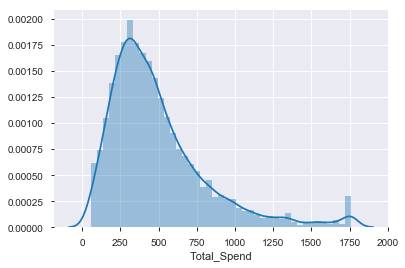

In [97]:
# Assumption checking of linear reg
# target variable should be normally distributed
sns.distplot(modified_data.Total_Spend)
plt.show()

In [98]:
modified_data['log_Total_Spend']=np.log(modified_data['Total_Spend'])

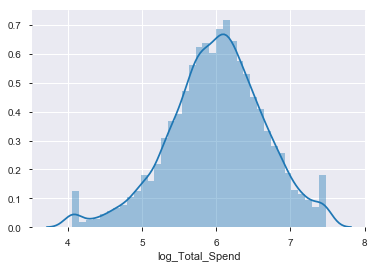

In [99]:
sns.distplot(modified_data.log_Total_Spend)
modified_data = modified_data.drop(['Total_Spend'],axis=1)

In [ ]:
# VARIBLE REDUCTION AND FEATURE SELECTION

# Variable reduction on the basis of correlation metrics(correlation coefficent>0.6)

In [102]:
modified_data.corr()

townsize    gender    agecat     edcat    jobcat  \
townsize              1.000000  0.009576 -0.069017  0.003744 -0.010768   
gender                0.009576  1.000000 -0.007427 -0.002673 -0.016470   
agecat               -0.069017 -0.007427  1.000000 -0.064124  0.032554   
edcat                 0.003744 -0.002673 -0.064124  1.000000 -0.069002   
jobcat               -0.010768 -0.016470  0.032554 -0.069002  1.000000   
union                -0.019846  0.000311  0.004465 -0.003240  0.084778   
employ               -0.059221 -0.011756  0.679902 -0.199709  0.416234   
empcat               -0.058059 -0.013842  0.732246 -0.185672  0.346723   
retire               -0.065779 -0.021040  0.511335 -0.089322  0.173736   
income               -0.009478 -0.001949  0.234081  0.187173  0.106852   
inccat               -0.007582 -0.002149  0.249394  0.197250  0.067555   
debtinc              -0.019543  0.004746  0.040937  0.010705  0.003673   
creddebt             -0.039220 -0.006574  0.159151  0.118857  0.068486   
othdebt              -0.014535 -0.008475  0.176380  0.135689  0.073217   
lnothdebt            -0.002946 -0.001608  0.159017  0.155380  0.028732   
default               0.023540 -0.001620 -0.392859  0.103714 -0.086022   
jobsat               -0.031121  0.001782  0.422564 -0.065667  0.171703   
marital               0.029922  0.003888  0.004785 -0.022293  0.003116   
reside                0.044371  0.031148 -0.331160  0.013518 -0.014961   
pets                 -0.000967  0.028664  0.026966  0.030428  0.011706   
pets_cats            -0.018682  0.013703  0.021829  0.013500 -0.021394   
pets_dogs             0.031654 -0.013189  0.011527  0.028381  0.002461   
pets_birds           -0.012533  0.024293 -0.008446  0.013860  0.000999   
pets_reptiles         0.009830  0.006001  0.014706 -0.001208  0.007075   
pets_small            0.001648  0.012543  0.001663  0.007719  0.006446   
pets_saltfish         0.020930  0.003988 -0.002900 -0.004667 -0.001681   
pets_freshfish       -0.006999  0.024280  0.021392  0.018085  0.018599   
homeown               0.024133  0.006351 -0.014793  0.054535  0.028167   
hometype             -0.003217  0.003200 -0.027187  0.021945 -0.022920   
addresscat           -0.043250 -0.006030  0.829099 -0.020501  0.041350   
...                        ...       ...       ...       ...       ...   
owntv                 0.026513 -0.000600 -0.059942  0.030799  0.003551   
hourstv              -0.002511 -0.004984 -0.019651 -0.009332 -0.030434   
ownvcr               -0.004501 -0.003570  0.126323  0.069821  0.025124   
owndvd                0.016458  0.012181  0.120848  0.066569  0.011966   
owncd                 0.020715 -0.002861  0.078888  0.056563  0.022038   
ownpda                0.022813 -0.001116 -0.059490  0.293125 -0.009352   
ownpc                 0.002639 -0.006963 -0.123192  0.414619 -0.037929   
ownipod               0.005333 -0.021319 -0.208690  0.357481 -0.026888   
owngame               0.007898  0.001164 -0.223387  0.361191 -0.050278   
ownfax               -0.000562  0.009167 -0.029310  0.273646  0.008409   
news                 -0.028756 -0.020837  0.348275 -0.068420  0.090861   
response_01          -0.006252  0.018058  0.010039 -0.112653  0.000137   
response_02          -0.010070  0.001385  0.010467  0.070172  0.002888   
response_03          -0.007230 -0.009685 -0.014860  0.106223 -0.008415   
region_2             -0.122630  0.005929  0.001682  0.000149 -0.016154   
region_3             -0.014877  0.000888  0.004764  0.002879 -0.007489   
region_4              0.090608 -0.017708 -0.028909  0.022514 -0.006765   
region_5              0.335490 -0.000195  0.002176 -0.004145  0.008511   
birthmonth_August    -0.000043  0.003717  0.003384 -0.006546 -0.008274   
birthmonth_December   0.019912 -0.016896 -0.013575 -0.010645  0.008243   
birthmonth_February  -0.024500  0.015168  0.019426 -0.020811 -0.000695   
birthmonth_January   -0.008957  0.000704 -0.003469  0.009974 -0.006297   
birthmonth_July       0.00

In [106]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset


correlation(modified_data, 0.6)

# Feature Selection based on importance using F-Regression

In [154]:
features = modified_data[modified_data.columns.difference(['log_Total_Spend'])]
target = modified_data['log_Total_Spend']
F_values, p_values  = f_regression(features, target )

In [155]:
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

Variable     F_Value P_Value
0                 active    0.099140   0.753
1                 agecat    4.560250   0.033
2                  bfast    4.065689   0.044
3      birthmonth_August    0.226917   0.634
4    birthmonth_December    2.645083   0.104
5    birthmonth_February    1.691716   0.193
6     birthmonth_January    0.000866   0.977
7        birthmonth_July    0.184530   0.668
8        birthmonth_June    0.143664   0.705
9       birthmonth_March    0.008795   0.925
10        birthmonth_May    0.065670   0.798
11   birthmonth_November    0.252214   0.616
12    birthmonth_October    0.000024   0.996
13  birthmonth_September    0.270970   0.603
14              callcard    2.314608   0.128
15             carbought    0.160034   0.689
16                carbuy    1.277132   0.258
17                  card  298.331861   0.000
18                 card2   29.990236   0.000
19          card2benefit    0.007779   0.930
20              card2fee    1.945245   0.163
21             card2type    0.404878   0.525
22           cardbenefit    2.018254   0.155
23               cardfee    0.364467   0.546
24              cardtype    0.000029   0.996
25                carown   27.674973   0.000
26                  cars    0.995049   0.319
27               cartype    0.059694   0.807
28                 churn    1.873489   0.171
29           commutebike    3.309558   0.069
..                   ...         ...     ...
58               ownipod    8.424830   0.004
59                ownpda   24.646407   0.000
60                 owntv   36.512224   0.000
61                ownvcr  125.995381   0.000
62                  pets    0.112238   0.738
63            pets_birds    1.689187   0.194
64             pets_cats    0.035311   0.851
65             pets_dogs    0.265735   0.606
66         pets_reptiles    2.303407   0.129
67         pets_saltfish    0.063503   0.801
68            pets_small    0.069119   0.793
69            polcontrib    5.567432   0.018
70              polparty    0.140413   0.708
71               polview    1.084997   0.298
72                reason    1.308831   0.253
73              region_2    0.054454   0.815
74              region_3    0.012331   0.912
75              region_4    0.434984   0.510
76              region_5    4.281407   0.039
77           response_01    0.421452   0.516
78           response_02    3.600705   0.058
79           response_03   19.020900   0.000
80                retire  204.476976   0.000
81           telecommute    0.044376   0.833
82                tenure   14.163837   0.000
83              tollfree   14.792822   0.000
84              townsize    0.187955   0.665
85                 union    2.245453   0.134
86                  vote   15.628862   0.000
87              wireless   27.549440   0.000

[88 rows x 3 columns]

In [156]:
f_reg_results.P_Value = f_reg_results.P_Value.astype('float')

In [166]:
# selected vars on basis of on importance using F-Regression
selected_features_from_f_reg = f_reg_results[f_reg_results.P_Value<=0.05].Variable.tolist()

# Variable Reduction using Recursive Feature Elimination


In [183]:
ligreg = LinearRegression()
rfe = RFE(ligreg, 15)
rfe = rfe.fit(features, target )
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True  True False False
 False False False False False False  True  True False False False False
  True  True False False False False  True False False False False False
 False False False False False False False  True  True False False False
 False False False False]
[36  1 57 29  1  1 31 28 20 37 43 30 23 40 51  3 34  1  1 74 16 65 73 41
 60  2 54 32 18  4 25 17 70 33  6 21 26 69 44 68  1 19 24 66  1  1 42 67
 52 13 38 64 48 50  1  1 53 27 46 58  1  1 61 15 56 62  1 14 71  8 49 47
 63 11 12  7  5 39 35  1  1 22 72  9 45 10 55 59]


In [184]:
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, rfe.get_support())]
feature_map

[('active', False),
 ('agecat', True),
 ('bfast', False),
 ('birthmonth_August', False),
 ('birthmonth_December', True),
 ('birthmonth_February', True),
 ('birthmonth_January', False),
 ('birthmonth_July', False),
 ('birthmonth_June', False),
 ('birthmonth_March', False),
 ('birthmonth_May', False),
 ('birthmonth_November', False),
 ('birthmonth_October', False),
 ('birthmonth_September', False),
 ('callcard', False),
 ('carbought', False),
 ('carbuy', False),
 ('card', True),
 ('card2', True),
 ('card2benefit', False),
 ('card2fee', False),
 ('card2type', False),
 ('cardbenefit', False),
 ('cardfee', False),
 ('cardtype', False),
 ('carown', False),
 ('cars', False),
 ('cartype', False),
 ('churn', False),
 ('commutebike', False),
 ('commutebus', False),
 ('commutecarpool', False),
 ('commutecat', False),
 ('commutemotorcycle', False),
 ('commutenonmotor', False),
 ('commutepublic', False),
 ('commuterail', False),
 ('commutetime', False),
 ('commutewalk', False),
 ('debtinc', False),

In [185]:
selected_features_from_rfe = features.columns[rfe.get_support()].tolist()

# Feature Selection using Select K-Best technique

In [186]:
Kbest = SelectKBest(f_classif, k=15).fit(features, target )
Kbest.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False])

In [187]:
Kbest.scores_

array([0.99558822, 0.97085501, 1.08477987, 1.26632032, 1.02719361,
       0.81153137, 0.97480409, 0.77302604, 0.82525139, 1.13961749,
       1.43564649, 1.03391606, 0.85953583, 1.22335687, 1.04965806,
       0.97175901, 1.00279754, 1.10262509, 1.19796941, 1.15461919,
       1.10060702, 0.90447528, 1.01883609, 0.96917035, 0.95537703,
       1.06514188, 1.11380553, 1.01612211, 1.12647526, 1.10381263,
       0.95756014, 1.08831692, 1.01056788, 0.83970671, 1.02716352,
       0.88757259, 1.00918474, 1.07609142, 0.96001115, 1.08891051,
       1.38527749, 1.0836507 , 1.21112998, 1.04516152, 1.03391763,
       0.99849439, 0.95652301, 0.97615846, 0.87840249, 1.08031759,
       0.99283896, 0.91835811, 1.03629401, 1.12262108, 0.67874299,
       0.87138107, 1.14909338, 1.07209666, 1.01972701, 1.1956037 ,
       0.81658156, 0.81177889, 1.00406531, 0.84243065, 1.11058433,
       0.91059936, 0.54425231, 1.60300973, 0.91717454, 0.94030348,
       0.95955948, 0.85516238, 1.1369187 , 1.08143932, 0.96285

In [188]:
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, X_new.get_support())]
feature_map

[('active', False),
 ('agecat', False),
 ('bfast', False),
 ('birthmonth_August', True),
 ('birthmonth_December', False),
 ('birthmonth_February', False),
 ('birthmonth_January', False),
 ('birthmonth_July', False),
 ('birthmonth_June', False),
 ('birthmonth_March', True),
 ('birthmonth_May', True),
 ('birthmonth_November', False),
 ('birthmonth_October', False),
 ('birthmonth_September', True),
 ('callcard', False),
 ('carbought', False),
 ('carbuy', False),
 ('card', True),
 ('card2', True),
 ('card2benefit', True),
 ('card2fee', False),
 ('card2type', False),
 ('cardbenefit', False),
 ('cardfee', False),
 ('cardtype', False),
 ('carown', False),
 ('cars', True),
 ('cartype', False),
 ('churn', True),
 ('commutebike', True),
 ('commutebus', False),
 ('commutecarpool', False),
 ('commutecat', False),
 ('commutemotorcycle', False),
 ('commutenonmotor', False),
 ('commutepublic', False),
 ('commuterail', False),
 ('commutetime', False),
 ('commutewalk', False),
 ('debtinc', False),
 ('d

In [189]:
selected_features_from_Kbest = features.columns[Kbest.get_support()].tolist()

In [ ]:
# Create a combined list of features selected from all above techniques and perform VIF reduction technique to get final list of features 

# Variable reduction using Variance Inflation Factor

In [190]:
selected_features = set(selected_features_from_f_reg + selected_features_from_rfe + selected_features_from_Kbest)

In [191]:
invalid_symbols = "-+*%/" #these symbols are needed to removed as they may mislead equation
col_list = []
for col_name in modified_data.columns:
    for symbol in invalid_symbols:
        col_name = col_name.replace(symbol,'_')
    col_list.append(col_name)
modified_data.columns = col_list

In [192]:
col_list = []
for col_name in selected_features:
    for symbol in invalid_symbols:
        col_name = col_name.replace(symbol,'_')
    col_list.append(col_name)
selected_features = col_list

In [199]:
feature_string = '+'.join(set(selected_features))
equation = 'log_Total_Spend~' + feature_string
equation

'log_Total_Spend~homeown+gender+jobsat+card2+tenure+agecat+ownfax+multline+birthmonth_September+retire+birthmonth_May+birthmonth_February+wireless+reason+response_03+tollfree+ownipod+card+owngame+pets_saltfish+birthmonth_December+vote+ebill+birthmonth_August+owncd+hourstv+polcontrib+birthmonth_March+bfast+equip+income+internet+owntv+ownvcr+churn+edcat+pets_reptiles+default+ownpda+owndvd+region_5+card2benefit+carown'

In [200]:
Y,X=dmatrices(equation,modified_data,return_type='dataframe')
vif = pd.DataFrame()
vif['VIF_value'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

VIF_value              features
0   131.168098             Intercept
1     1.048420               homeown
2     1.013753                gender
3     1.296038                jobsat
4     1.200575                 card2
5     2.353928                tenure
6     2.468654                agecat
7     1.554446                ownfax
8     1.624487              multline
9     1.087524  birthmonth_September
10    1.915380                retire
11    1.084161        birthmonth_May
12    1.080374   birthmonth_February
13    2.037969              wireless
14    1.005953                reason
15    1.028092           response_03
16    1.318517              tollfree
17    1.447290               ownipod
18    1.184513                  card
19    1.488155               owngame
20    1.006383         pets_saltfish
21    1.078146   birthmonth_December
22    1.033149                  vote
23    1.837233                 ebill
24    1.077572     birthmonth_August
25    1.544562                 owncd
26    1.351866               hourstv
27    1.012463            polcontrib
28    1.079688      birthmonth_March
29    1.024261                 bfast
30    1.981564                 equip
31    1.584787                income
32    2.041438              internet
33    1.651319                 owntv
34    1.565991                ownvcr
35    1.339283                 churn
36    1.526091                 edcat
37    1.010631         pets_reptiles
38    1.220729               default
39    1.586606                ownpda
40    1.541494                owndvd
41    1.011562              region_5
42    1.008324          card2benefit
43    1.056304                carown

In [201]:
#Here, we take cut off of VIF is 2 and reduce variable(highest VIF >2) one by one 
X = X.drop(['agecat'],axis=1)
vif = pd.DataFrame()
vif['VIF_value'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

VIF_value              features
0   119.100773             Intercept
1     1.044490               homeown
2     1.013753                gender
3     1.238088                jobsat
4     1.200510                 card2
5     2.168830                tenure
6     1.554144                ownfax
7     1.624446              multline
8     1.087517  birthmonth_September
9     1.536613                retire
10    1.083883        birthmonth_May
11    1.080257   birthmonth_February
12    2.037064              wireless
13    1.005198                reason
14    1.027983           response_03
15    1.318432              tollfree
16    1.434989               ownipod
17    1.184391                  card
18    1.473335               owngame
19    1.006287         pets_saltfish
20    1.077958   birthmonth_December
21    1.033146                  vote
22    1.837233                 ebill
23    1.077565     birthmonth_August
24    1.544491                 owncd
25    1.351559               hourstv
26    1.012221            polcontrib
27    1.079641      birthmonth_March
28    1.019810                 bfast
29    1.981518                 equip
30    1.465928                income
31    2.041383              internet
32    1.647444                 owntv
33    1.563752                ownvcr
34    1.339220                 churn
35    1.523462                 edcat
36    1.009993         pets_reptiles
37    1.145590               default
38    1.586099                ownpda
39    1.538527                owndvd
40    1.011557              region_5
41    1.008288          card2benefit
42    1.055629                carown

In [203]:
X = X.drop(['tenure'],axis=1)
vif = pd.DataFrame()
vif['VIF_value'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

VIF_value              features
0   118.171093             Intercept
1     1.040115               homeown
2     1.013745                gender
3     1.222072                jobsat
4     1.200185                 card2
5     1.553072                ownfax
6     1.308722              multline
7     1.087360  birthmonth_September
8     1.370093                retire
9     1.083881        birthmonth_May
10    1.080198   birthmonth_February
11    2.036965              wireless
12    1.005145                reason
13    1.027580           response_03
14    1.318262              tollfree
15    1.429605               ownipod
16    1.184388                  card
17    1.468206               owngame
18    1.006287         pets_saltfish
19    1.077634   birthmonth_December
20    1.032727                  vote
21    1.836833                 ebill
22    1.077524     birthmonth_August
23    1.537616                 owncd
24    1.351256               hourstv
25    1.011734            polcontrib
26    1.079625      birthmonth_March
27    1.018385                 bfast
28    1.981487                 equip
29    1.393548                income
30    2.037568              internet
31    1.645179                 owntv
32    1.547771                ownvcr
33    1.240679                 churn
34    1.511330                 edcat
35    1.009978         pets_reptiles
36    1.120584               default
37    1.585633                ownpda
38    1.520743                owndvd
39    1.011536              region_5
40    1.008267          card2benefit
41    1.055487                carown

In [204]:
X = X.drop(['internet'],axis=1)
vif = pd.DataFrame()
vif['VIF_value'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

VIF_value              features
0   118.159283             Intercept
1     1.039957               homeown
2     1.013245                gender
3     1.221724                jobsat
4     1.200044                 card2
5     1.549581                ownfax
6     1.297454              multline
7     1.087360  birthmonth_September
8     1.370018                retire
9     1.083434        birthmonth_May
10    1.080164   birthmonth_February
11    2.021109              wireless
12    1.005093                reason
13    1.027292           response_03
14    1.310651              tollfree
15    1.417757               ownipod
16    1.183841                  card
17    1.444546               owngame
18    1.005451         pets_saltfish
19    1.077303   birthmonth_December
20    1.032704                  vote
21    1.745226                 ebill
22    1.077333     birthmonth_August
23    1.537475                 owncd
24    1.350008               hourstv
25    1.011464            polcontrib
26    1.079602      birthmonth_March
27    1.018327                 bfast
28    1.850972                 equip
29    1.393364                income
30    1.644324                 owntv
31    1.547591                ownvcr
32    1.235163                 churn
33    1.486467                 edcat
34    1.009738         pets_reptiles
35    1.120559               default
36    1.581385                ownpda
37    1.520732                owndvd
38    1.010957              region_5
39    1.008262          card2benefit
40    1.055390                carown

In [205]:
X = X.drop(['wireless'],axis=1)
vif = pd.DataFrame()
vif['VIF_value'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

VIF_value              features
0   118.065000             Intercept
1     1.039955               homeown
2     1.013059                gender
3     1.221721                jobsat
4     1.200044                 card2
5     1.415770                ownfax
6     1.293974              multline
7     1.087166  birthmonth_September
8     1.366950                retire
9     1.083145        birthmonth_May
10    1.080120   birthmonth_February
11    1.005023                reason
12    1.027284           response_03
13    1.216305              tollfree
14    1.415467               ownipod
15    1.182758                  card
16    1.439532               owngame
17    1.005218         pets_saltfish
18    1.077056   birthmonth_December
19    1.032451                  vote
20    1.728414                 ebill
21    1.077241     birthmonth_August
22    1.537475                 owncd
23    1.349905               hourstv
24    1.011271            polcontrib
25    1.079420      birthmonth_March
26    1.018140                 bfast
27    1.825734                 equip
28    1.392506                income
29    1.644253                 owntv
30    1.547429                ownvcr
31    1.234956                 churn
32    1.483992                 edcat
33    1.009656         pets_reptiles
34    1.120459               default
35    1.442643                ownpda
36    1.520009                owndvd
37    1.010928              region_5
38    1.008186          card2benefit
39    1.055348                carown

In [208]:
vif = vif.loc[1:,:]
final_selected_vars = list(vif.features) +['log_Total_Spend']
print(final_selected_vars)

['homeown', 'gender', 'jobsat', 'card2', 'ownfax', 'multline', 'birthmonth_September', 'retire', 'birthmonth_May', 'birthmonth_February', 'reason', 'response_03', 'tollfree', 'ownipod', 'card', 'owngame', 'pets_saltfish', 'birthmonth_December', 'vote', 'ebill', 'birthmonth_August', 'owncd', 'hourstv', 'polcontrib', 'birthmonth_March', 'bfast', 'equip', 'income', 'owntv', 'ownvcr', 'churn', 'edcat', 'pets_reptiles', 'default', 'ownpda', 'owndvd', 'region_5', 'card2benefit', 'carown', 'log_Total_Spend']


In [215]:
modified_data = modified_data.loc[final_selected_vars]
modified_data.head()

homeown  gender  jobsat  card2  ownfax  multline  birthmonth_September  \
0        0       1       1      5       0         1                     1   
1        1       0       1      4       1         1                     0   
2        1       1       4      4       0         1                     0   
3        1       0       2      3       0         1                     0   
4        0       0       1      1       0         0                     0   

   retire  birthmonth_May  birthmonth_February  ...  churn  edcat  \
0       0               0                    0  ...      1      3   
1       0               1                    0  ...      0      4   
2       0               0                    0  ...      0      2   
3       0               1                    0  ...      0      3   
4       0               0                    0  ...      0      3   

   pets_reptiles  default  ownpda  owndvd  region_5  card2benefit  carown  \
0              0        1       0       1         0             1       1   
1              0        1       1       1         1             3       1   
2              0        0       0       1         0             3       1   
3              0        1       0       1         0             4       1   
4              0        0       0       1         0             2       0   

   log_Total_Spend  
0         5.007029  
1         4.350794  
2         5.886021  
3         5.884464  
4         6.230147  

[5 rows x 40 columns]

# Split the data into train & test(70:30)

In [261]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(modified_data,test_size=0.3,random_state = 10) 
train_X,test_X,train_y,test_y =train_test_split(modified_data.loc[:,modified_data.columns.difference(['log_Total_Spend'])],modified_data['log_Total_Spend'],test_size=0.3,random_state = 10) 

# Model Building

In [262]:
train_X['intercept'] = 1.0
test_X['intercept'] = 1.0

In [263]:
import statsmodels.formula.api as smf
linear_model = smf.OLS(train_y,train_X).fit() 

In [264]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Total_Spend   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     27.12
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          2.99e-169
Time:                        03:14:26   Log-Likelihood:                -2964.0
No. Observations:                3500   AIC:                             6008.
Df Residuals:                    3460   BIC:                             6254.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bfast                    0.0059 

# Prediction

In [265]:
y_pred_test = linear_model.predict(test_X)
y_pred_train = linear_model.predict(train_X)

# Validating Model by calculating metrics

In [266]:
actual_spend_train = np.exp(train_y)
actual_spend_test = np.exp(test_y)
spend_pred_train = np.exp(y_pred_train)
spend_pred_test = np.exp(y_pred_test)

In [267]:
#MSE
print(metrics.mean_squared_error(actual_spend_train,spend_pred_train))
print(metrics.mean_squared_error(actual_spend_test,spend_pred_test))

82495.1631639484
84992.84019603771


In [269]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(actual_spend_train,spend_pred_train)))
print(np.sqrt(metrics.mean_squared_error(actual_spend_test,spend_pred_test)))

287.21971235266636
291.5353155211864


In [271]:
#MAE
from sklearn import metrics
print(metrics.mean_absolute_error(actual_spend_train,spend_pred_train))
print(metrics.mean_absolute_error(actual_spend_test,spend_pred_test))

199.3886372373168
201.6426345030227


In [272]:
#MAPE
print(sum(abs((actual_spend_train-spend_pred_train)/actual_spend_train))/len(actual_spend_train))
print(sum(abs((actual_spend_test-spend_pred_test)/actual_spend_test))/len(actual_spend_test))

0.5181974602343599
0.5130459743673423


# Drivers(positive and negative) for total spend

In [288]:
# top 15 drivers and their coefficient in linear regresssion equation
np.abs(linear_model.params).sort_values(ascending=False)[1:16]

owntv                  0.239017
retire                 0.187452
card                   0.162023
owndvd                 0.113493
ownvcr                 0.107617
gender                 0.086737
card2                  0.086371
response_03            0.069202
owncd                  0.065029
birthmonth_February    0.053051
birthmonth_December    0.039194
churn                  0.036748
tollfree               0.036402
region_5               0.030911
polcontrib             0.022725
dtype: float64

In [297]:
# top 10 positive drivers and their coefficient in linear regresssion equation
linear_model.params.sort_values(ascending=False)[1:11]

owndvd                 0.113493
ownvcr                 0.107617
response_03            0.069202
owncd                  0.065029
birthmonth_December    0.039194
churn                  0.036748
region_5               0.030911
polcontrib             0.022725
equip                  0.022475
pets_reptiles          0.020617
dtype: float64

In [298]:
# top 10 negative drivers and their coefficient in linear regresssion equation
linear_model.params.sort_values(ascending=True)[0:10]

owntv                 -0.239017
retire                -0.187452
card                  -0.162023
gender                -0.086737
card2                 -0.086371
birthmonth_February   -0.053051
tollfree              -0.036402
ebill                 -0.022393
birthmonth_May        -0.018204
birthmonth_August     -0.016990
dtype: float64

# Residual Analysis

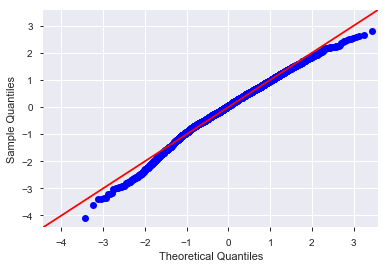

In [286]:
import statsmodels.api as sm
sm.qqplot(linear_model.resid,fit=True,line='45')
plt.show()

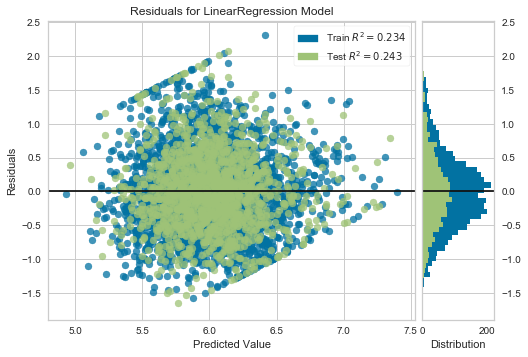

In [299]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
visualizer = ResidualsPlot(model).fit(train_X,train_y)
visualizer.score(test_X,test_y)
visualizer.poof()
# this plot show that there is no pattern in residuals vs predicted value
#so Homoscedasticity assumption is checked

In [ ]:
# Evaluating metrics and residual analysis, we can observe that linear regression fits good on data
# But accuracy can be imporoved 
# The main purpose for using linear regression is to identify positive and negative drivers
# To improve accuracy, models such as DTs with or without ensembling can be used

# Using Random Forests for better accuracy

In [300]:
train_X = train_X.drop(['intercept'],axis=1)
test_X = test_X.drop(['intercept'],axis=1)

In [303]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 16),
    'max_features': np.arange(3,7),
    'bootstrap': [False, True],
    'n_jobs':[-1]
}

tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200, 300], 'max_features': array([3, 4, 5, 6]), 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'bootstrap': [False, True], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [304]:
tree.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 6,
 'n_estimators': 100,
 'n_jobs': -1}

In [308]:
y_pred_test = tree.predict(test_X)
y_pred_train = tree.predict(train_X)

In [309]:
actual_spend_train = np.exp(train_y)
actual_spend_test = np.exp(test_y)
spend_pred_train = np.exp(y_pred_train)
spend_pred_test = np.exp(y_pred_test)

In [313]:
#MSE
print(metrics.mean_squared_error(actual_spend_train,spend_pred_train))
print(metrics.mean_squared_error(actual_spend_test,spend_pred_test))

47328.10521761513
81344.62293322243


In [314]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(actual_spend_train,spend_pred_train)))
print(np.sqrt(metrics.mean_squared_error(actual_spend_test,spend_pred_test)))

217.55023607804964
285.20978758314453


In [315]:
#MAE
from sklearn import metrics
print(metrics.mean_absolute_error(actual_spend_train,spend_pred_train))
print(metrics.mean_absolute_error(actual_spend_test,spend_pred_test))

146.02303336445783
194.7830521005078


In [316]:
#MAPE
print(sum(abs((actual_spend_train-spend_pred_train)/actual_spend_train))/len(actual_spend_train))
print(sum(abs((actual_spend_test-spend_pred_test)/actual_spend_test))/len(actual_spend_test))

0.35394614664763335
0.48337233134479834


In [ ]:
# accuracy is improved after using Random forests
# variable importance(drivers) can be obtained through Random Forests but not positive and negative drivers seperately

In [319]:
rf = RandomForestRegressor(bootstrap=True,max_depth=11,max_features=6,n_estimators=100).fit(train_X,train_y)

In [321]:
# top 15 drivers
feature_imp_df = pd.DataFrame({'features': train_X.columns,'feature_importance':rf.feature_importances_}).sort_values(by=['feature_importance'],ascending=False)
feature_imp_df.iloc[:15,:]

features  feature_importance
19        income            0.198614
7           card            0.184390
8          card2            0.068584
18       hourstv            0.058121
20        jobsat            0.035700
36        retire            0.034069
14         edcat            0.031512
9   card2benefit            0.026926
33        reason            0.023303
10        carown            0.022859
29        ownvcr            0.020321
0          bfast            0.019532
23        owndvd            0.016955
16        gender            0.014496
38          vote            0.014409

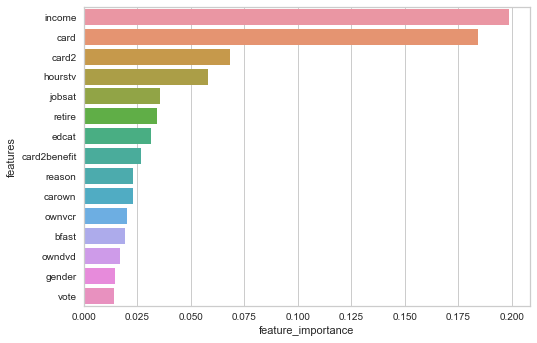

In [322]:
# top 15 drivers
sns.barplot(x=feature_imp_df.iloc[:15,:].feature_importance,y=feature_imp_df.iloc[:15,:].features)